In [1]:
%matplotlib inline
from itertools import product as cproduct
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from aux import load_data, Generic
from disp import set_font_size
from time_stats import xcov_with_confidence

# DATA
EXPT = 'ASENSORY_AZ'
BASE = 'BigMAT.csv'

COLS = [
    ('Time', 'Time'),
    ('G2', 'G2_avg'),
    ('G3', 'G3_avg'),
    ('G4', 'G4_avg'),
    ('G5', 'G5_avg'),
    ('Motion', 'Motion'),
    ('ForVel', 'ForVel'),
    ('AngVel', 'AngVel'),
    ('AbsAngVel', 'AngVel', np.abs),
]

NORMED_COLS = ['G2', 'G3', 'G4', 'G5', 'Motion', 'ForVel', 'AngVel', 'AbsAngVel']

ODOR = None

COLORS = {
    'G2': 'r', 'G3': 'c', 'G4': 'g', 'G5': 'm',
    'Motion': 'k', 'ForVel': 'k', 'AngVel': 'k',
}


# ANALYSIS
LAG = 50
DT = 0.1

# Load data

In [2]:
d = load_data(EXPT, BASE, COLS, NORMED_COLS, ODOR)

# DAN x DAN xcovs

In [3]:
dans = ['G2', 'G3', 'G4', 'G5']
xcovs_dan = {pair: None for pair in cproduct(dans, dans)}

for dan_0, dan_1 in cproduct(dans, dans):
    
    t = DT * np.arange(-LAG, LAG, dtype=float)
    xcovs = []
    
    for trial in d.trials:
        x = np.array(d.d_n[trial][dan_0])
        y = np.array(d.d_n[trial][dan_1])
        
        xcovs.append(
            xcov_with_confidence(x, y, lag_backward=LAG, lag_forward=LAG)[0])
        
    
    xcovs = np.array(xcovs)
    mean = xcovs.mean(0)
    
    xcovs_dan[(dan_0, dan_1)] = Generic(t=t, xcovs=xcovs, mean=mean)

/home/rkp/Dropbox/Repositories/mushroom_mushroom_chap/time_stats.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  z = 0.5 * np.log((1 + rho) / (1 - rho))  # convert to z-space
/home/rkp/Dropbox/Repositories/mushroom_mushroom_chap/time_stats.py:49: RuntimeWarning: invalid value encountered in double_scalars
  lb = (np.exp(2*lb_z) - 1) / (np.exp(2*lb_z) + 1)
/home/rkp/Dropbox/Repositories/mushroom_mushroom_chap/time_stats.py:50: RuntimeWarning: invalid value encountered in double_scalars
  ub = (np.exp(2*ub_z) - 1) / (np.exp(2*ub_z) + 1)


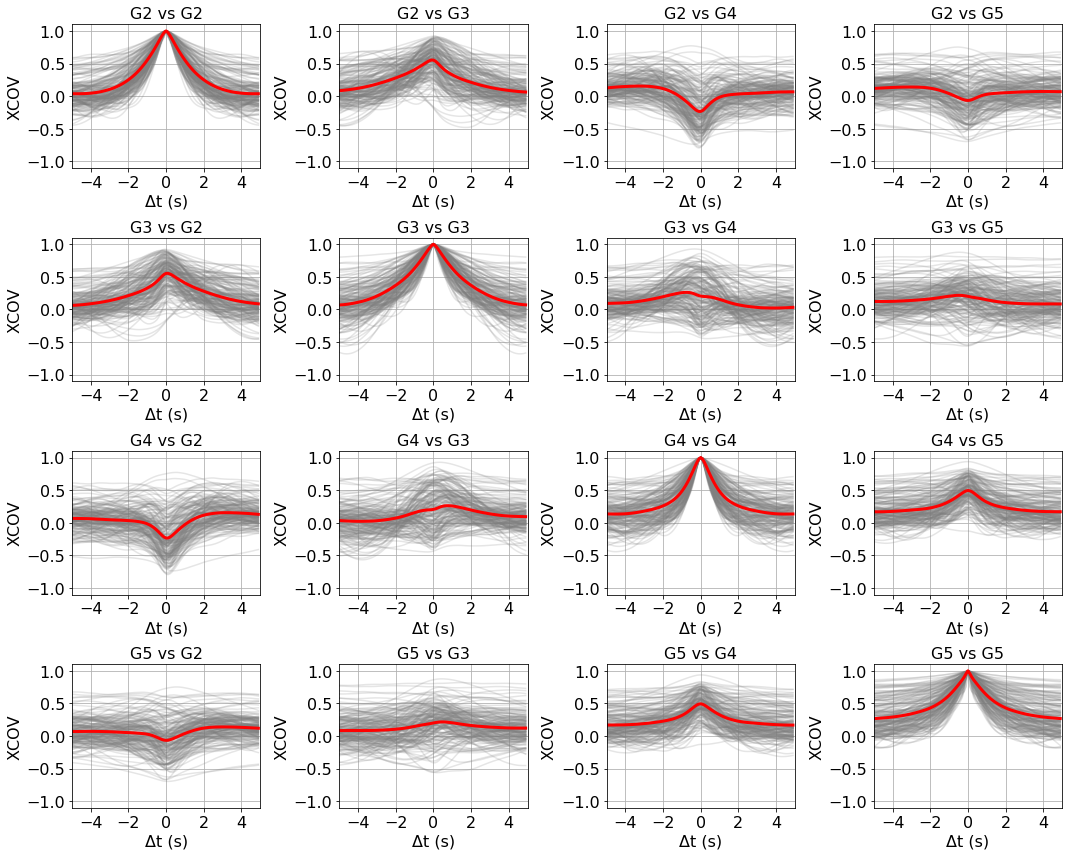

In [4]:
fig_size = (15, 12)
font_size = 16

fig, axs = plt.subplots(4, 4, figsize=fig_size, tight_layout=True)

for r_ctr, ax_row in enumerate(axs):
    for c_ctr, ax in enumerate(ax_row):
        
        key = (dans[r_ctr], dans[c_ctr])
        xcov = xcovs_dan[key]
        
        ax.plot(xcov.t, xcov.xcovs.T, c='gray', alpha=0.2)
        
        ax.plot(xcov.t, xcov.mean, c='r', lw=3)
        
        ax.set_xlim(-LAG*DT, LAG*DT)
        ax.set_ylim(-1.1, 1.1)
        ax.grid()
        
        ax.set_xlabel('Δt (s)')
        ax.set_ylabel('XCOV')
        ax.set_title(' vs '.join(key))
        
for ax in axs.flat:
    set_font_size(ax, font_size)